In [1]:
import os

import pywt
import numpy as np
import pandas as pd
import tensorflow as tf
from ssqueezepy.visuals import plot, imshow
import matplotlib.pyplot as plt

from utils.load_data_utils import load_to_df, create_rolling_window_data

2024-05-01 13:13:15.350543: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
tag = 7

accel_data_prefix = 'converted_data/'
accel_data_dir = accel_data_prefix + 'T' + str(tag).zfill(2) + '/'
accel_filepaths = os.listdir(accel_data_dir)
accel_filepaths = [accel_data_dir + file for file in accel_filepaths if file.startswith('sensor_data') and file.endswith('0725.csv')]

groundtruth_dir = 'behavior_analysis/individual_behaviors/'
groundtruth_path = groundtruth_dir + 'C' + str(tag).zfill(2) + '_0725.csv'

accel_input_df, groundtruth_df = load_to_df(accel_filepaths, groundtruth_path)
X, y = create_rolling_window_data(accel_input_df, groundtruth_df, window_size=20, stride=5)

print(X.shape, y.shape)

/Users/maxleblang/Desktop/cow-posture-analysis/utils/load_data_utils.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  standardized_input.fillna(method='ffill', inplace=True)


Base time is: 1
(11985, 200, 3) (11985,)


In [17]:
behaviors = {
    "1":[],
    "2":[],
    "3":[],
    "4":[],
    "5":[],
    "6":[],
    "7":[]
}

for data,b in zip(X,y):
    behaviors[str(int(b))].append(data.T)

In [20]:
def plot_wavelet(signal, ax, wv = "cmor2.5-1.5"):
    # scale = np.geomspace(1, 1024, num=200)
    scale = range(1,201)
    cwtmatr, freqs = pywt.cwt(signal, scale, wv)
    print(cwtmatr.shape)
    cwtmatr = np.abs(cwtmatr[:-1, :-1])
    time = range(len(signal))

    pcm = ax.pcolormesh(time, freqs, cwtmatr)
    ax.set_yscale("log")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (Hz)")
    plt.colorbar(pcm, ax=ax)

(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)


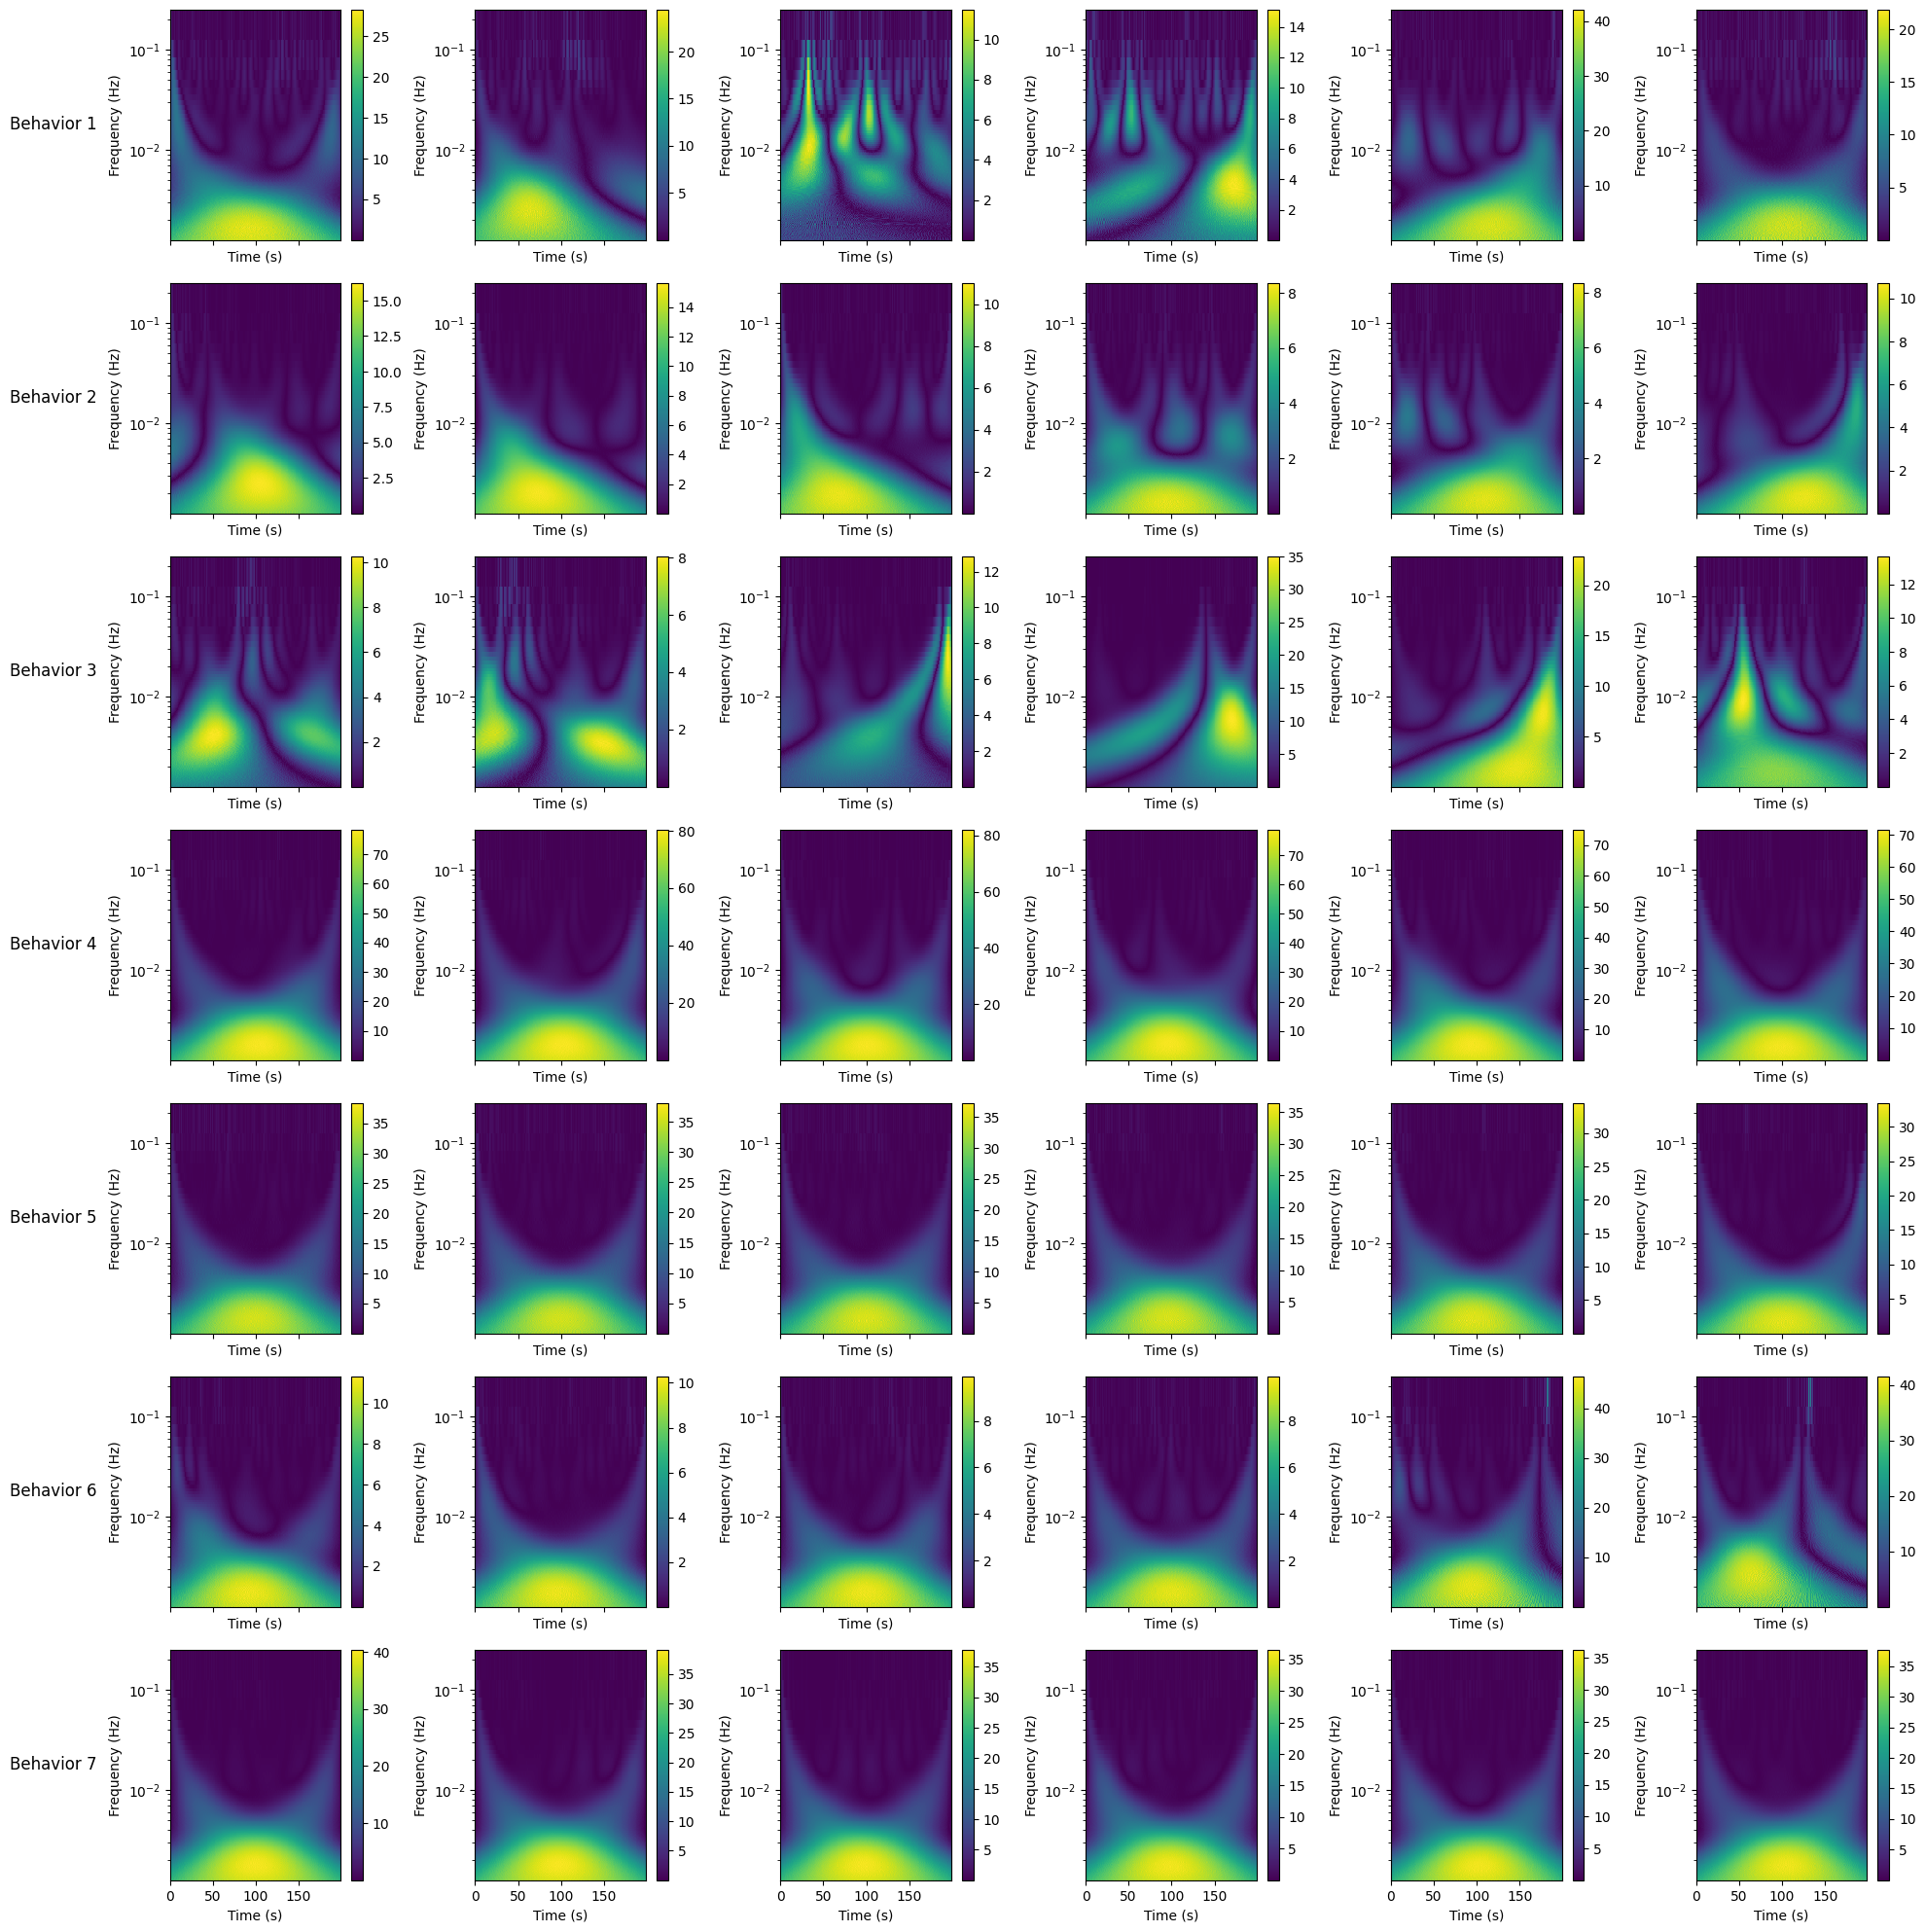

In [21]:
fig, axs = plt.subplots(7, 6, figsize=(20, 20), sharex=True)

for b in range(1,8):
    for i in range(6):
        data = behaviors[str(b)][i]

        # Only look at y data
        # accel_x = data[0]
        accel_y = data[1]
        # accel_z = data[2]
        plot_wavelet(accel_y,axs[b-1,i],wv = "mexh")



# Add behavior labels
rows = ["Behavior " + str(b) for b in range(1,8)]
for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()

# plt.savefig("Wavelet comparisons.png")